## LIMPEZA DOS DADOS

In [122]:
import pandas as pd
import tensorflow as tf
import seaborn as sb
import numpy as np

# Carregando e fazendo visualizações iniciais
df = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [123]:
print(df.nunique()) # Verificando a quantidade de valores nulos


PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


Aqui se pode verificar que não há discrepâncias claras de quantidade de valores categoricos parar as colunas categóricas

- Verificação dos valores nulos:

In [124]:
print(df.isna().sum()) # Verificando se há valores nulos

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Aqui vemos uma grande quantidade de valores nulos em Cabin, o que indica que remover a coluna seria uma boa escolha. Além disso, precisamos encontrar uma maneira de tratar as idades que estão faltando.

- Verificação das correlações:

C:\Users\renae\AppData\Local\Temp\ipykernel_18048\3442138956.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr())


<Axes: >

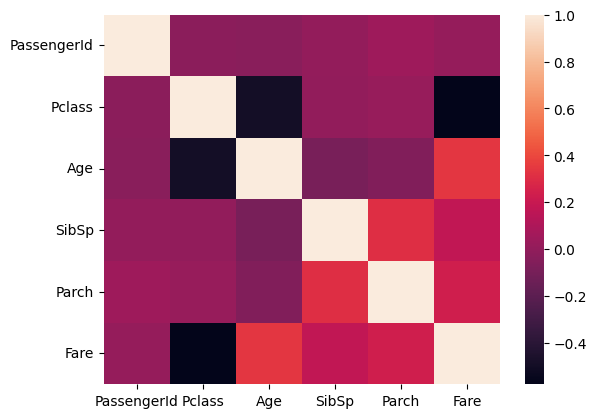

In [125]:
sb.heatmap(df.corr())

A partir do heatmap não foi possível encontrar boas correlações e nem mesmo uma boa coluna a partir da qual inferir os valores de idade que estão faltando no dataset original

- Verificação dos valores categóricos:

In [126]:
print(df.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


As colunas Ticket, Name e Cabin podem ser removidas por serem inerentemente irrelevantes. A coluna Embarked também não parece ser relevante para a análise final.

In [127]:
cols = ['Name', 'Cabin', 'Ticket', 'Embarked']
df.drop(cols, axis=1, inplace=True)
train.drop(cols, axis=1, inplace=True)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


Agora, basta substituir os valores dos sexos para 0: male e 1: female. Por termos baixa cardinalidade, é possível usar um One-Hot Encoder

In [119]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
hot_enc = OneHotEncoder()
df_hot = pd.get_dummies(df['Sex'])
train_hot = pd.get_dummies(train['Sex'])

df = df.drop(['Sex'], axis='columns')
train = train.drop(['Sex'], axis='columns')

df = pd.concat([df, df_hot], axis='columns')
train = pd.concat([train, train_hot], axis='columns')
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male
0,892,3,34.5,0,0,7.8292,0,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,0,1
3,895,3,27.0,0,0,8.6625,0,1
4,896,3,22.0,1,1,12.2875,1,0


Por fim, precisamos encontrar uma forma de ajustar os valores perdidos de idade. À princípio, podemos imputar os valores com base na média.

In [129]:
from sklearn.impute import SimpleImputer

In [137]:
imputer = SimpleImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df))

# Devolvendo os nomes das colunas:
df_imputed.columns = df.columns
df_imputed.set_axis('PassengerId')
df_imputed.head()
print(df_imputed.isna().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
dtype: int64


# TREINAMENDO DO MODELO